Chọn ngôi chùa bất kì.
Phóng to ngôi chùa lên 5 lần.
Áp dụng một biến đổi hình học tùy chỉnh (geometric transform) để tạo hiệu ứng "uốn cong" (warping) ngôi chùa.
Lưu ảnh kết quả vào pagoda_warped.jpg.

✅ Ảnh đã được lưu tại: pagoda_warped.jpg


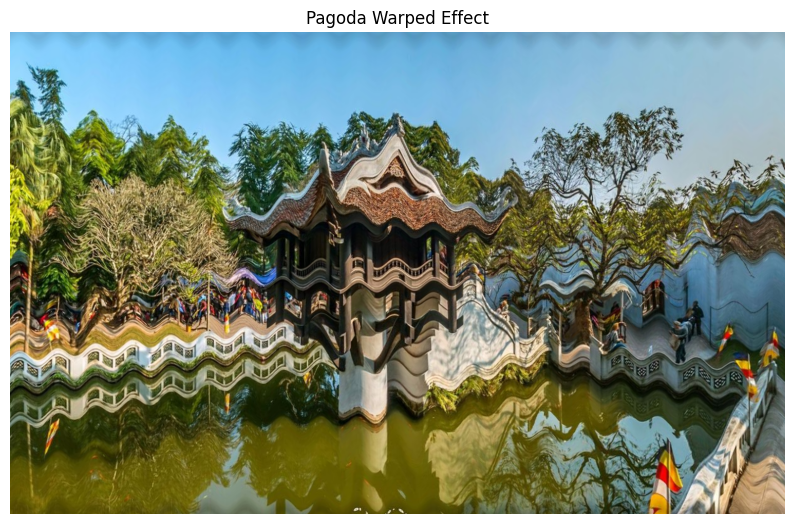

In [1]:
# 1. Thư viện cần thiết
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 2. Đọc ảnh ngôi chùa (định dạng JPG hoặc PNG đều được)
input_path = "exercise/chua.jpg"
img = cv2.imread(input_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 3. Phóng to ảnh 5 lần
scale_factor = 5
height, width = img.shape[:2]
resized_img = cv2.resize(img, (width * scale_factor, height * scale_factor), interpolation=cv2.INTER_CUBIC)

# 4. Hàm tạo biến dạng hình học "uốn cong" (sine wave warp)
def warp_image(img):
    h, w = img.shape[:2]
    map_y, map_x = np.indices((h, w), dtype=np.float32)

    # Biến dạng theo trục y dựa vào sin(x)
    wave_amplitude = 40.0  # Độ cong
    wave_frequency = 2 * np.pi / 300  # Tần số

    map_y += wave_amplitude * np.sin(map_x * wave_frequency)

    warped = cv2.remap(img, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
    return warped

# 5. Áp dụng hiệu ứng uốn cong
warped_img = warp_image(resized_img)

# 6. Lưu kết quả ra file
output_path = "pagoda_warped.jpg"
cv2.imwrite(output_path, cv2.cvtColor(warped_img, cv2.COLOR_RGB2BGR))
print(f"✅ Ảnh đã được lưu tại: {output_path}")

# 7. Hiển thị ảnh kết quả
plt.figure(figsize=(10, 8))
plt.imshow(warped_img)
plt.axis('off')
plt.title("Pagoda Warped Effect")
plt.show()
